# Emotion and Gender Recognition using Convolutional Neural Networks
--------------------------------------------------------------------------------------------

## Introduction and Background

In this project, I tackle the challenge of recognizing both emotion and gender from facial images using Convolutional Neural Networks (CNNs) implemented in TensorFlow. The primary goal is to develop a unified model capable of accurately classifying images into one of four categories: HappyMale, HappyFemale, SadMale, and SadFemale.

## Background
The project stems from the need to handle two distinct datasets effectively: one labeled by gender (male/female) and the other by emotion (happy/sad). Traditional approaches might treat these tasks separately, but our objective was to integrate these two classification tasks into a single predictive model, enhancing both the efficiency and accuracy of predictions.

## Strategy
The approach involved initially developing two separate models:

- Gender Model: Trained exclusively on the gender dataset.

-  Emotion Model: Focused solely on the emotion dataset.

I then used these models in tandem to cross-predict labels on each dataset. For example, the emotion model predicted emotional states for images in the gender dataset, and vice versa. This cross-utilization allowed to generate a new, comprehensive dataset with images labeled with both gender and emotional state. This dataset then served to train a final model that can predict all four desired categories.

The project showcases the use of advanced machine learning techniques and model integration strategies to solve complex classification problems. It serves as a robust example of handling and combining disparate datasets to improve model performance in real-world tasks.

## Objectives

The main objectives of this data science project are to:

### 1. Develop Individual Models:
- **Gender Recognition Model**: Build and train a CNN model to accurately classify images based on gender (male or female).
- **Emotion Recognition Model**: Construct and train a separate CNN model to classify images based on expressed emotions (happy or sad).

### 2. Integrate Model Predictions:
- Utilize the outputs from the gender and emotion models to cross-label the datasets, thereby enriching the contextual understanding of each image.

### 3. Create a Unified Dataset:
- Combine the predictions from both models to create a new, enriched dataset that includes labels for both gender and emotion for each image.

### 4. Train a Unified Model:
- Develop a comprehensive CNN model using the newly created dataset that can predict four combined categories: HappyMale, HappyFemale, SadMale, and SadFemale. This model aims to leverage the nuanced features learned from the individual gender and emotion models.

### 5. Evaluate Model Performance:
- Thoroughly assess the accuracy and efficiency of the unified model across various metrics to ensure robustness and reliability in real-world scenarios.

### 6. Generalize Model Application:
- Demonstrate the model's capability to predict on unseen data, ensuring that it maintains high performance when introduced to new images outside the training and validation sets.



------

Import Necessary Libraries

In [1]:
# pip install opencv-python

In [2]:
import os
import random
import numpy as np
import cv2
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, AveragePooling2D, 
                                     Flatten, Dense, Dropout)
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Dataset 1: Load Male & Female images and assign lables

Assigning respective lables for `Male` and `Femlae` images and resizing the images by calling the function `load_gender_images`

In [32]:
# Function to load gender images
def load_gender_images(dataset_path, folder):
    """
    Load gender images from the specified dataset path and folder.

    Parameters:
    - dataset_path (str): Path to the dataset directory.
    - folder (str): Folder name containing male and female subfolders.

    Returns:
    - data (numpy.ndarray): Array of loaded images.
    - labels (numpy.ndarray): Array of corresponding gender labels.
    """
    # List to store image data
    data = []
    # List to store corresponding labels
    labels = []
    # Iterate through male and female folders
    for gender in ["male", "female"]:
        # Path to the current gender folder
        gender_path = os.path.join(dataset_path, folder, gender)
        # Iterate through image files in the gender folder
        for img_file in os.listdir(gender_path):
            # Path to the current image
            img_path = os.path.join(gender_path, img_file)
            # Read image using OpenCV
            img = cv2.imread(img_path)
            # Resize image to (64, 64)
            img = cv2.resize(img, (64, 64))
            # Append image data to list
            data.append(img)
            # Append corresponding label
            labels.append(gender)
    # Convert lists to numpy arrays and return
    return np.array(data), np.array(labels)

In [4]:
# Load and preprocess the gender datasets
gender_data, gender_labels = load_gender_images('./male-female', 'Training')

# Print the shape of loaded data and labels
gender_data.shape, gender_labels.shape

((47009, 64, 64, 3), (47009,))

In [5]:
gender_data

array([[[[  4,   7,  27],
         [  2,   6,  25],
         [  1,   6,  21],
         ...,
         [  8,  26,  49],
         [ 16,  34,  56],
         [ 13,  31,  54]],

        [[  5,   6,  26],
         [  4,   6,  24],
         [  3,   6,  20],
         ...,
         [  5,  24,  49],
         [ 11,  30,  56],
         [ 23,  41,  67]],

        [[  8,   8,  26],
         [  7,   7,  23],
         [  6,   6,  20],
         ...,
         [  1,  17,  50],
         [  5,  25,  55],
         [ 27,  48,  76]],

        ...,

        [[124, 117, 179],
         [127, 121, 186],
         [107, 103, 172],
         ...,
         [  0,   2,   3],
         [  1,   0,   2],
         [  1,   1,   1]],

        [[132, 125, 183],
         [123, 116, 178],
         [132, 127, 192],
         ...,
         [  0,   2,   3],
         [  1,   0,   2],
         [  0,   0,   0]],

        [[131, 125, 181],
         [128, 121, 181],
         [125, 121, 184],
         ...,
         [  0,   0,   1],
        

In [6]:
gender_labels

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype='<U6')

`plot_gender_images` function is to plot the images and their lables from the gender data

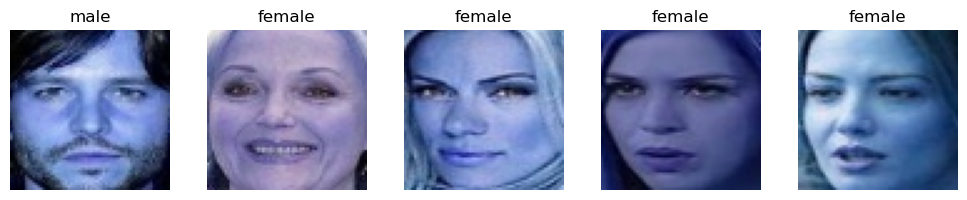

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gender_images(data, labels, num_images=5):
    """
    Plots a specified number of gender images with their labels.
    
    Parameters:
    - data: Numpy array of shape (n_images, height, width, channels), the image data.
    - labels: Numpy array of the labels of the images.
    - num_images: int, the number of images to plot.
    """
    # Randomly select a set of image indices to plot
    indices = np.random.choice(range(len(data)), num_images, replace=False)
    
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i, ax in enumerate(axes):
        idx = indices[i]  # The index for both the image and its label
        ax.imshow(data[idx])  # Display the image
        ax.set_title(labels[idx])  # Display the corresponding label
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_gender_images(gender_data, gender_labels, num_images=5)

let's Check the distribution of the data

male: 23766
female: 23243


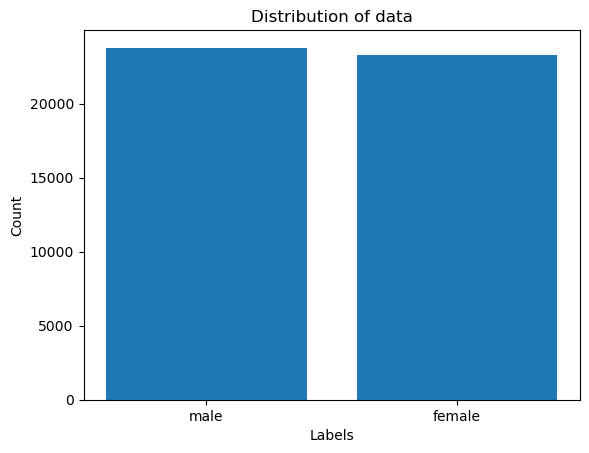

In [8]:
label_counts = {}
for label in gender_labels:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"{label}: {count}")
    
# Create a bar plot
plt.bar(label_counts.keys(), label_counts.values())

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of data')

# Show plot
plt.show()

The data is almost balanced!!

Encode the gender lables into `categorical`

In [9]:
le_gender = LabelEncoder()
gender_labels_encoded = le_gender.fit_transform(gender_labels)
gender_labels_categorical = to_categorical(gender_labels_encoded, 2)

gender_labels_categorical.shape, gender_labels_categorical

((47009, 2),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32))

# Dataset 2: Load Happy-Sad images

`load_emotion_images` function to load the images h5py file

In [33]:
# Function to load Happy-Sad images
def load_emotion_images(file_path, train_test):
    dataset = h5py.File(file_path, "r")
    data = np.array(dataset[train_test+'_set_x'][:])
    labels = np.array(dataset[train_test+'_set_y'][:])
    labels = np.where(labels == 0, 'Sad', 'Happy')
    return data, labels

In [11]:
# Load and preprocess the datasets
emotion_data, emotion_labels = load_emotion_images('./happy/train_happy.h5/train_happy.h5','train')
emotion_data.shape, emotion_labels.shape

((600, 64, 64, 3), (600,))

In [12]:
emotion_data

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

In [13]:
emotion_labels

array(['Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad',
       'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad',
       'Happy', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Sad', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy',
       'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad',
       'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad',
       'Sad', 'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Happy', 'Sad',
       'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Happy',
       'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Happy',
       'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy',
       'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy',
       'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Happy',
       'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy

`plot_emotion_images` function is to plot the images and their lables from the happy-sad data

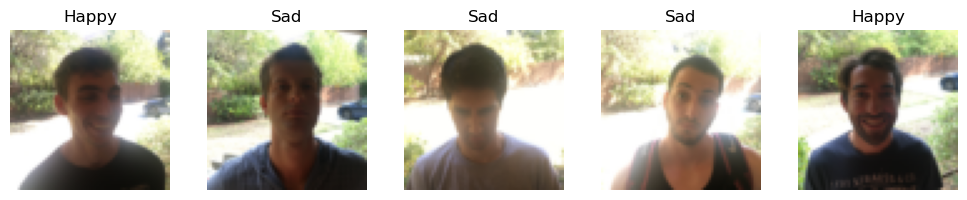

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_emotion_images(data, labels, num_images=5):
    """
    Plots a specified number of emotion images with their labels.
    
    Parameters:
    - data: Numpy array of shape (n_images, height, width, channels), the image data.
    - labels: Numpy array of the labels of the images.
    - num_images: int, the number of images to plot.
    """
    # Randomly select a set of image indices to plot
    indices = np.random.choice(range(len(data)), num_images, replace=False)
    
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i, ax in enumerate(axes):
        idx = indices[i]  # The index for both the image and its label
        ax.imshow(data[idx])  # Display the image
        ax.set_title(labels[idx])  # Display the corresponding label
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
plot_emotion_images(emotion_data, emotion_labels, num_images=5)

let's Check the distribution of the data

Sad: 300
Happy: 300


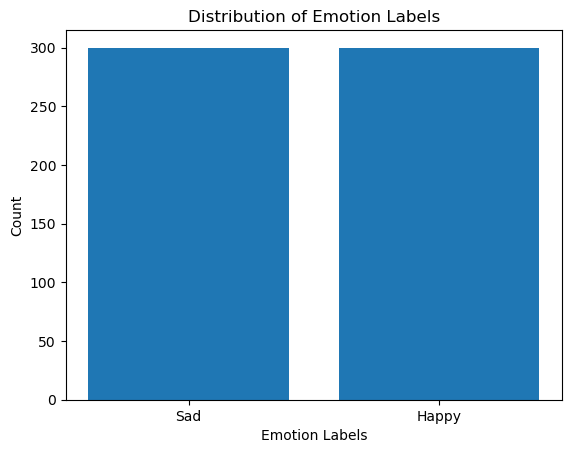

In [15]:
label_counts = {}
for label in emotion_labels:
    label_counts[label] = label_counts.get(label, 0) + 1

# Print label counts
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Create a bar plot
plt.bar(label_counts.keys(), label_counts.values())

# Add labels and title
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')

# Show plot
plt.show()

Perfectly balanced!!

Encode the emotion lables into `categorical`

In [16]:
# Encode labels
le_emotion = LabelEncoder()
emotion_labels_encoded = le_emotion.fit_transform(emotion_labels)
emotion_labels_categorical = to_categorical(emotion_labels_encoded, 2)
emotion_labels_categorical.shape, emotion_labels_categorical

((600, 2),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

# Split the datasets into training and validation

In [17]:
# Split the datasets
X_gender_train, X_gender_val, y_gender_train, y_gender_val = train_test_split(gender_data, gender_labels_categorical, test_size=0.2, random_state=42)
X_emotion_train, X_emotion_val, y_emotion_train, y_emotion_val = train_test_split(emotion_data, emotion_labels_categorical, test_size=0.2, random_state=42)

In [18]:
X_gender_train.shape, X_gender_val.shape, y_gender_train.shape, y_gender_val.shape

((37607, 64, 64, 3), (9402, 64, 64, 3), (37607, 2), (9402, 2))

In [19]:
X_emotion_train.shape, X_emotion_val.shape, y_emotion_train.shape, y_emotion_val.shape

((480, 64, 64, 3), (120, 64, 64, 3), (480, 2), (120, 2))

# LeNet-5 CNN model architecture

In [20]:
def create_lenet5_model(num_classes):
    model = Sequential()
    # Add Rescaling layer to scale images to [0, 1]
    model.add(Rescaling(1./255, input_shape=(64, 64, 3)))
    
    # First set of CONV => ACTIVATION => POOL layers
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Second set of CONV => ACTIVATION => POOL layers
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the network
    model.add(Flatten())

    # First FC layer
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.5))

    # Second FC layer
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer with softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 1.Gender_model: Create, train, and save

In [21]:
# Create, train, and save the gender model
gender_model = create_lenet5_model(num_classes=2)
gender_model.summary()
gender_model.fit(X_gender_train, y_gender_train, epochs=50, batch_size=32, validation_data=(X_gender_val, y_gender_val))
gender_model.save('gender_le5_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 32, 32, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 average_pooling2d_1 (Avera  (None, 15, 15, 32)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 7200)              0

1176/1176 [==============================] - 49s 39ms/step - loss: 0.3371 - accuracy: 0.8536 - val_loss: 0.2291 - val_accuracy: 0.9088
Epoch 2/50
1176/1176 [==============================] - 47s 40ms/step - loss: 0.1996 - accuracy: 0.9245 - val_loss: 0.1603 - val_accuracy: 0.9405
Epoch 3/50
1176/1176 [==============================] - 62s 53ms/step - loss: 0.1680 - accuracy: 0.9395 - val_loss: 0.1496 - val_accuracy: 0.9453
Epoch 4/50
1176/1176 [==============================] - 49s 42ms/step - loss: 0.1507 - accuracy: 0.9459 - val_loss: 0.1457 - val_accuracy: 0.9491
Epoch 5/50
1176/1176 [==============================] - 49s 42ms/step - loss: 0.1410 - accuracy: 0.9503 - val_loss: 0.1365 - val_accuracy: 0.9517
Epoch 6/50
1176/1176 [==============================] - 48s 41ms/step - loss: 0.1268 - accuracy: 0.9552 - val_loss: 0.1452 - val_accuracy: 0.9494
Epoch 7/50
1176/1176 [==============================] - 51s 44ms/step - loss: 0.1202 - accuracy: 0.9576 - val_loss: 0.1377 - val_accura

C:\Users\91833\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 2.Emotion_model: Create, train, and save

In [22]:
# Create, train, and save the emotion model
emotion_model = create_lenet5_model(num_classes=2)
emotion_model.fit(X_emotion_train, y_emotion_train, epochs=50, batch_size=32, validation_data=(X_emotion_val, y_emotion_val))
emotion_model.save('emotion_le5_model.h5')

Epoch 1/50
15/15 [==============================] - 2s 51ms/step - loss: 0.7213 - accuracy: 0.4979 - val_loss: 0.6910 - val_accuracy: 0.5583
Epoch 2/50
15/15 [==============================] - 1s 39ms/step - loss: 0.6886 - accuracy: 0.5417 - val_loss: 0.6788 - val_accuracy: 0.7583
Epoch 3/50
15/15 [==============================] - 1s 41ms/step - loss: 0.6722 - accuracy: 0.5896 - val_loss: 0.6499 - val_accuracy: 0.6000
Epoch 4/50
15/15 [==============================] - 1s 43ms/step - loss: 0.6360 - accuracy: 0.6562 - val_loss: 0.6036 - val_accuracy: 0.7333
Epoch 5/50
15/15 [==============================] - 1s 43ms/step - loss: 0.5271 - accuracy: 0.7458 - val_loss: 0.4725 - val_accuracy: 0.7500
Epoch 6/50
15/15 [==============================] - 1s 44ms/step - loss: 0.4018 - accuracy: 0.8375 - val_loss: 0.3908 - val_accuracy: 0.7917
Epoch 7/50
15/15 [==============================] - 1s 45ms/step - loss: 0.3311 - accuracy: 0.8687 - val_loss: 0.3773 - val_accuracy: 0.8583
Epoch 8/50
15

# 3.Load the saved models to make predictions and get emotion and gender lables

1. Combine the `predicted gender` to the `happy-sad data` which already have emotion lables
2. Combine the `predicted emotion` to the `male and female gender data` which already have gender lables

In [24]:
# Load models for cross-predictions
gender_model = load_model('gender_le5_model.h5')
emotion_model = load_model('emotion_le5_model.h5')

With the `Gender model` lets give the `happy-sad data` to `Predict Gender`

In [25]:
# Predict gender on emotion dataset
gender_predictions = gender_model.predict(X_emotion_train)
gender_predicted_labels = np.argmax(gender_predictions, axis=1)
gender_predicted_labels = le_gender.inverse_transform(gender_predicted_labels)

15/15 [==============================] - 1s 22ms/step


In [26]:
gender_predicted_labels

array(['male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'male', 'female', 'male', 'female', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 

Now, we have the `predicted gender` to our `happy-sad data`

With the `Emotion model` lets give the `Male and Female Gender data` to `Predict Emotion`

In [27]:
# Predict emotion on gender dataset
emotion_predictions = emotion_model.predict(X_gender_train)
emotion_predicted_labels = np.argmax(emotion_predictions, axis=1)
emotion_predicted_labels = le_emotion.inverse_transform(emotion_predicted_labels)

1176/1176 [==============================] - 22s 18ms/step


In [29]:
emotion_predicted_labels

array(['Happy', 'Happy', 'Sad', ..., 'Happy', 'Happy', 'Happy'],
      dtype='<U5')

Now, we have the `predicted emotions` to our `gender data`

In [30]:
reversed_emotion_train_labels = np.argmax(y_emotion_train, axis=1)
reversed_emotion_train_labels_original = le_emotion.inverse_transform(reversed_emotion_train_labels)

In [31]:
reversed_emotion_train_labels_original

array(['Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy',
       'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy',
       'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy',
       'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad',
       'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad',
       'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad',
       'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad',
       'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy',
       'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy',
       'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy',
       'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad',
       'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad',
       'Happy', 'Sad', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy',
       'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad',
       

In [32]:
reversed_gender_train_labels = np.argmax(y_gender_train, axis=1)
reversed_gender_train_labels_original = le_gender.inverse_transform(reversed_gender_train_labels)

In [33]:
reversed_gender_train_labels_original

array(['female', 'male', 'male', ..., 'female', 'male', 'male'],
      dtype='<U6')

In [34]:
# Combine and save the new labels
combined_labels_emotion_dataset = ['{}_{}'.format(emotion, gender) for emotion, gender in zip(reversed_emotion_train_labels_original, gender_predicted_labels)]
combined_labels_gender_dataset = ['{}_{}'.format(emotion, gender ) for emotion, gender  in zip(emotion_predicted_labels, reversed_gender_train_labels_original)]

In [35]:
len(combined_labels_emotion_dataset)

480

In [36]:
combined_labels_emotion_dataset

['Happy_male',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Happy_male',
 'Sad_male',
 'Sad_female',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Sad_male',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Happy_female',
 'Sad_male',
 'Sad_female',
 'Happy_male',
 'Sad_female',
 'Sad_female',
 'Sad_male',
 'Sad_male',
 'Sad_male',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Happy_female',
 'Sad_male',
 'Sad_male',
 'Sad_female',
 'Sad_male',
 'Sad_male',
 'Happy_male',
 'Sad_female',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Sad_male',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Sad_female',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'S

In [37]:
len(combined_labels_gender_dataset)

37607

In [38]:
combined_labels_gender_dataset

['Happy_female',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Sad_female',
 'Sad_male',
 'Sad_female',
 'Happy_female',
 'Sad_female',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Happy_female',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Sad_female',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Sad_female',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Sad_female',
 'Sad_male',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_female',
 'Happy_male',
 'Sad_female',
 'Happy_female',
 'Happy_male',
 'Sad_female',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Sad_female',
 'Sad_male',
 'Sad_female',
 'Sad_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Sad_female',
 'Happy_ma

Saving the new datasets in .h5 format with the newly created combined labels

Saving the emotion dataset

In [39]:
combined_labels_emotion_array = np.array(combined_labels_emotion_dataset)
combined_labels_emotion_encoded = np.array(combined_labels_emotion_array).astype('S')  # Convert to byte strings

# Save the datasets
with h5py.File('predicted_emotion_dataset.h5', 'w') as h5f:
    h5f.create_dataset('data_emotion', data=X_emotion_train)  # Your image data
    h5f.create_dataset('labels_emotion', data=combined_labels_emotion_encoded)

In [40]:
len(combined_labels_emotion_encoded)

480

In [41]:
with h5py.File('predicted_emotion_dataset.h5', 'r') as h5f:
    # Load the data
    data_emotion = h5f['data_emotion'][:]

    # Load the labels
    labels_emotion = h5f['labels_emotion'][:]

# convert labels back to strings
labels_emotion = [label.decode('utf-8') for label in labels_emotion]

In [42]:
len(labels_emotion),len(data_emotion)

(480, 480)

Saving the gender dataset

In [43]:
combined_labels_gender_array = np.array(combined_labels_gender_dataset)
combined_labels_gender_encoded = np.array(combined_labels_gender_array).astype('S')  # Convert to byte strings

# Save the datasets
with h5py.File('predicted_gender_dataset.h5', 'w') as h5f:
    h5f.create_dataset('data_gender', data=X_gender_train)  # Your image data
    h5f.create_dataset('labels_gender', data=combined_labels_gender_encoded)

In [44]:
with h5py.File('predicted_gender_dataset.h5', 'r') as h5f:
    # Load the data
    data_gender = h5f['data_gender'][:]

    # Load the labels
    labels_gender = h5f['labels_gender'][:]

# convert labels back to strings
labels_gender = [label.decode('utf-8') for label in labels_gender]

print("Data loaded successfully")

Data loaded successfully


In [45]:
len(data_gender),len(data_emotion)

(37607, 480)

In [46]:
len(labels_gender),len(labels_emotion)

(37607, 480)

Let's concatenate the data and labels from both emotion and gender datasets which has lables as HappyMale, HappyFemale, SadMale, SadFemale.

In [47]:
# Concatenate the data and labels from both emotion and gender datasets
merged_data = np.concatenate((data_gender, data_emotion), axis=0)
merged_labels = np.concatenate((labels_gender, labels_emotion), axis=0)

Saving the dataset

In [48]:
merged_labels_array = np.array(merged_labels)

merged_labels_array_encoded = np.array(merged_labels_array).astype('S') 

# Save the merged datasets
with h5py.File('predicted_merged_dataset.h5', 'w') as h5f:
    h5f.create_dataset('data', data=merged_data)
    h5f.create_dataset('labels', data=merged_labels_array_encoded)

print("Merged dataset saved as predicted_merged_dataset.h5")

Merged dataset saved as predicted_merged_dataset.h5


Read the saved dataset

In [5]:
with h5py.File('predicted_merged_dataset.h5', 'r') as h5f:
    # Load the data
    data = h5f['data'][:]

    # Load the labels
    labels = h5f['labels'][:]

labels = [label.decode('utf-8') for label in labels]

In [6]:
data

array([[[[ 35,  40,  61],
         [ 45,  50,  69],
         [ 48,  52,  70],
         ...,
         [ 27,  35,  52],
         [ 29,  37,  54],
         [ 34,  42,  59]],

        [[ 48,  54,  73],
         [ 44,  50,  69],
         [ 44,  49,  67],
         ...,
         [ 28,  37,  53],
         [ 26,  34,  51],
         [ 31,  40,  57]],

        [[ 52,  59,  76],
         [ 43,  50,  67],
         [ 32,  39,  54],
         ...,
         [ 32,  39,  55],
         [ 26,  33,  48],
         [ 27,  33,  49]],

        ...,

        [[ 18,  30,  54],
         [ 30,  43,  71],
         [ 47,  65,  96],
         ...,
         [ 22,  26,  41],
         [ 35,  38,  53],
         [ 34,  37,  52]],

        [[ 42,  55,  85],
         [ 48,  62,  94],
         [ 50,  66, 101],
         ...,
         [ 25,  28,  43],
         [ 35,  38,  53],
         [ 38,  41,  56]],

        [[ 49,  67, 101],
         [ 57,  74, 110],
         [ 59,  76, 117],
         ...,
         [ 34,  37,  52],
        

In [7]:
labels

['Happy_female',
 'Happy_male',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Happy_female',
 'Sad_male',
 'Happy_female',
 'Happy_female',
 'Sad_female',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Happy_male',
 'Happy_female',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Happy_female',
 'Sad_male',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Happy_male',
 'Sad_male',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_male',
 'Sad_male',
 'Happy_male',
 'Happy_male',
 'Sad_female',
 'Happy_male',
 'Happy_female',
 'Happy_female',
 'Happy_male',
 'Happy_female',
 'Happy_

In [8]:
len(data)

38087

In [9]:
len(labels)

38087

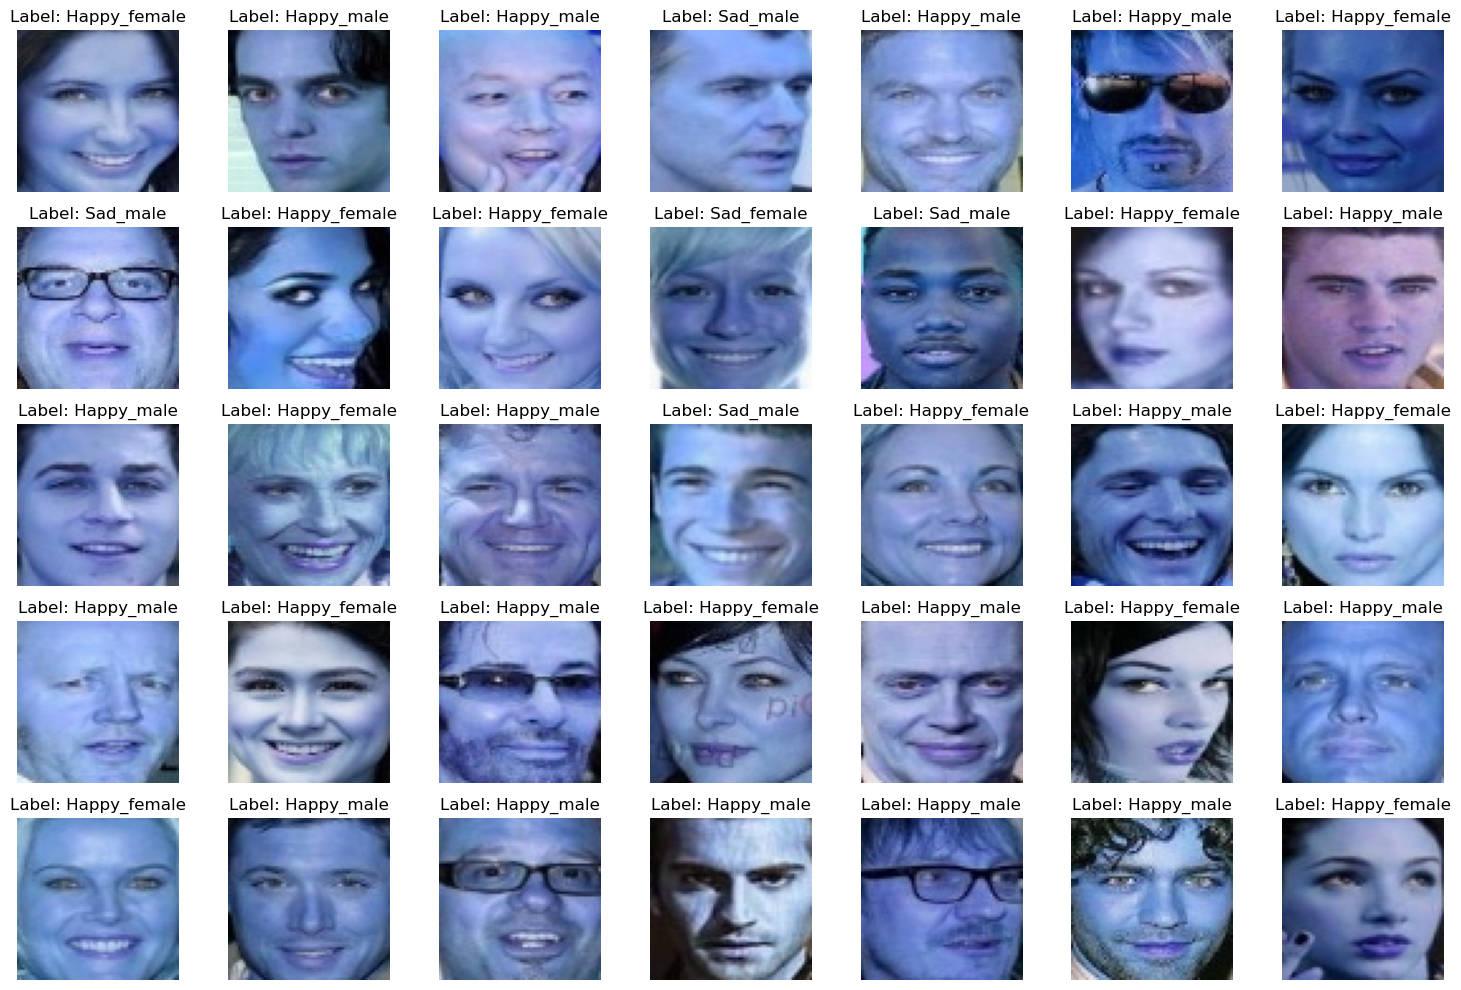

In [10]:
num_rows = 5  # Number of rows
num_cols = 7  # Number of columns
num_images = num_rows * num_cols  # Total number of images to plot

plt.figure(figsize=(15, 10))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(data[i])
    plt.title('Label: ' + labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Encode labels
le_merged = LabelEncoder()
merged_labels_encoded = le_merged.fit_transform(labels)
merged_labels_categorical = to_categorical(merged_labels_encoded, 4)

In [12]:
merged_labels_categorical

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

# 3. Unified Emotion and Gender model with the final dataset that consists of four classes

In [25]:
# Split the datasets
X_merged_train, X_merged_val, y_merged_train, y_merged_val = train_test_split(data, merged_labels_categorical, test_size=0.2, random_state=42)

In [70]:
# Create, train, and save the merged model
merged_model = create_lenet5_model(num_classes=4)
history_merged = merged_model.fit(X_merged_train, y_merged_train, epochs=20, batch_size=32, validation_data=(X_merged_val, y_merged_val))
merged_model.save('merged_le5_model.h5')

Epoch 1/20
953/953 [==============================] - 44s 46ms/step - loss: 0.6817 - accuracy: 0.7191 - val_loss: 0.3820 - val_accuracy: 0.8527
Epoch 2/20
953/953 [==============================] - 40s 42ms/step - loss: 0.4347 - accuracy: 0.8380 - val_loss: 0.3144 - val_accuracy: 0.8775
Epoch 3/20
953/953 [==============================] - 39s 41ms/step - loss: 0.3693 - accuracy: 0.8627 - val_loss: 0.2888 - val_accuracy: 0.8922
Epoch 4/20
953/953 [==============================] - 45s 48ms/step - loss: 0.3265 - accuracy: 0.8802 - val_loss: 0.2804 - val_accuracy: 0.8921
Epoch 5/20
953/953 [==============================] - 42s 44ms/step - loss: 0.2996 - accuracy: 0.8867 - val_loss: 0.2561 - val_accuracy: 0.8996
Epoch 6/20
953/953 [==============================] - 38s 40ms/step - loss: 0.2794 - accuracy: 0.8950 - val_loss: 0.2564 - val_accuracy: 0.9004
Epoch 7/20
953/953 [==============================] - 43s 45ms/step - loss: 0.2657 - accuracy: 0.8998 - val_loss: 0.2429 - val_accuracy:

In [76]:
def plot_model_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

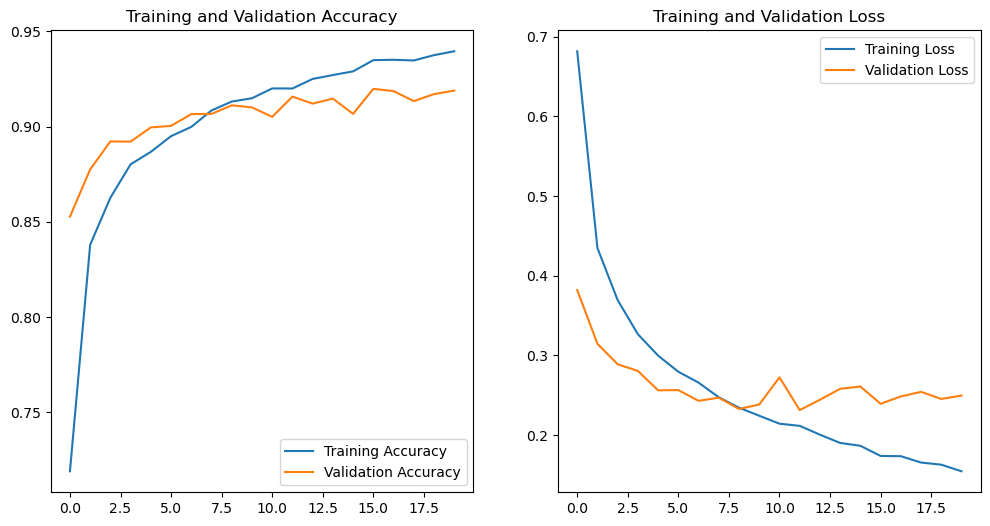

In [77]:
# Plot model performance
plot_model_performance(history_merged)

In [26]:
merged_model = load_model('merged_le5_model.h5') 

In [27]:
# Get class names directly from the LabelEncoder instance
class_names = le_merged.classes_

# Now, `class_names` contains the original class names as encoded by LabelEncoder
print("Class names:", class_names)

Class names: ['Happy_female' 'Happy_male' 'Sad_female' 'Sad_male']


In [28]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you've already made predictions with your model
predictions = merged_model.predict(X_merged_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_merged_val, axis=1)

# Generate a classification report using the actual class names
print(classification_report(true_classes, predicted_classes, target_names=class_names))

239/239 [==============================] - 4s 14ms/step
              precision    recall  f1-score   support

Happy_female       0.94      0.95      0.95      3458
  Happy_male       0.92      0.92      0.92      2995
  Sad_female       0.75      0.62      0.68       246
    Sad_male       0.85      0.86      0.86       919

    accuracy                           0.92      7618
   macro avg       0.87      0.84      0.85      7618
weighted avg       0.92      0.92      0.92      7618



# 4.Test final prediction model to predict one of four classes on the original test datasets

In [34]:
# Load and preprocess the test datasets
gender_test_data, gender_test_labels = load_gender_images('./male-female', 'Validation')
emotion_test_data, emotion_test_labels = load_emotion_images('./happy/test_happy.h5/test_happy.h5','test')

In [35]:
from sklearn.utils import shuffle
merged_test_images = np.concatenate((gender_test_data, emotion_test_data))
merged_test_images = shuffle(merged_test_images, random_state=42)

In [36]:
len(merged_test_images)

11799

In [37]:
merged_model = load_model('merged_le5_model.h5')

In [38]:
# Predict final labels on merged dataset
merged_predictions = merged_model.predict(merged_test_images)
merged_predicted_labels = np.argmax(merged_predictions, axis=1)
merged_predicted_labels = le_merged.inverse_transform(merged_predicted_labels)

369/369 [==============================] - 6s 14ms/step


In [39]:
merged_predicted_labels

array(['Happy_female', 'Happy_male', 'Happy_female', ..., 'Happy_male',
       'Happy_male', 'Happy_female'], dtype='<U12')

In [48]:
def display_predictions(images, predicted_labels):
    plt.figure(figsize=(10, 10))
    
    random_indices = random.sample(range(len(images)), 25)
    for i, idx in enumerate(random_indices):  # Display 25 random images
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx])
        plt.xlabel(f'Pred: {predicted_labels[idx]}')
    plt.show()

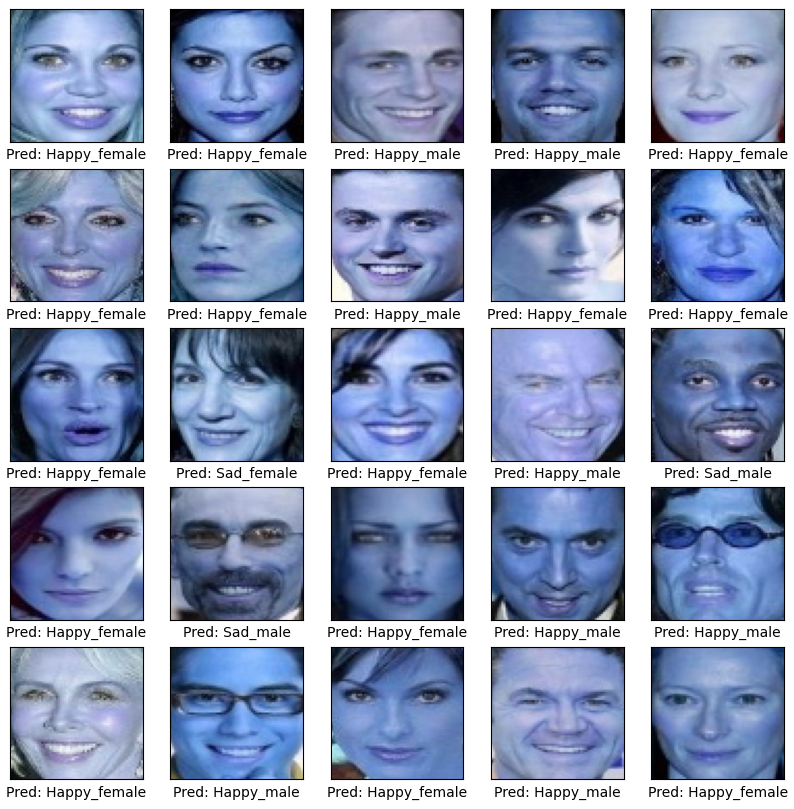

In [49]:
display_predictions(merged_test_images, merged_predicted_labels)

# 5. Predict the Emotion and Gender on the any given Image

In [66]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load your trained model
model = load_model('merged_le5_model.h5')

# `le_merged` is previously fitted LabelEncoder
class_names = le_merged.classes_

# Step 2: Load and preprocess an image
def preprocess_image(image_path, target_size=(64, 64, 3)):
    # Load the image
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image_array = img_to_array(image)
    # Add a new axis to make the array shape (1, 64, 64, 3)
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Replace 'img.jpeg' with the path to the image you want to predict
image_path = 'happymale.jpeg'
processed_image = preprocess_image(image_path)

# Predict the class
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=1)

# Decode the prediction
predicted_label = class_names[predicted_class[0]]
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 215ms/step
Predicted label: Happy_male


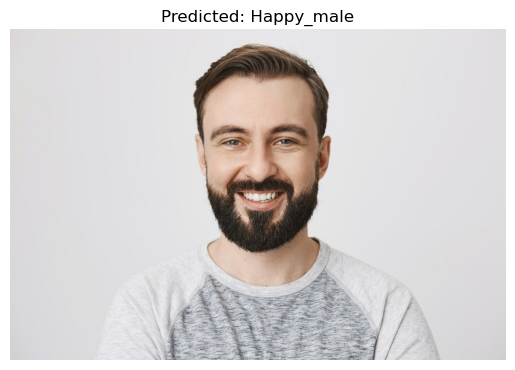

In [67]:
def plot_image(image_path, predicted_label):
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')  # Hide the axis ticks and labels
    plt.show()

plot_image(image_path, predicted_label)

In [68]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load your trained model
model = load_model('merged_le5_model.h5')

# `le_merged` is previously fitted LabelEncoder
class_names = le_merged.classes_

# Step 2: Load and preprocess an image
def preprocess_image(image_path, target_size=(64, 64, 3)):
    # Load the image
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image_array = img_to_array(image)
    # Add a new axis to make the array shape (1, 64, 64, 3)
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Replace 'img.jpeg' with the path to the image you want to predict
image_path = 'sadmale.jpg'
processed_image = preprocess_image(image_path)

# Predict the class
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=1)

# Decode the prediction
predicted_label = class_names[predicted_class[0]]
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 207ms/step
Predicted label: Sad_male


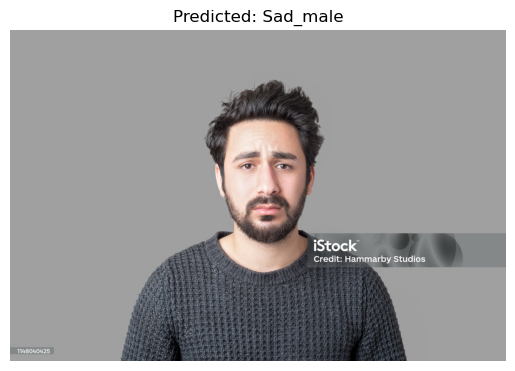

In [69]:
def plot_image(image_path, predicted_label):
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')  # Hide the axis ticks and labels
    plt.show()

plot_image(image_path, predicted_label)

# Conclusion

This project successfully demonstrated the capability of Convolutional Neural Networks (CNNs) to integrate and analyze complex image data for gender and emotion recognition. By developing individual models for gender and emotion and subsequently integrating these models to predict combined categories, we have created a robust system that not only meets our initial objectives but also sets a benchmark for similar future tasks.

## Achievements
- **Development of Robust Models**: We developed and fine-tuned individual models for gender and emotion recognition, which proved to be highly accurate in their respective tasks.
- **Innovative Integration Strategy**: The strategy to cross-utilize predictions from each model to enrich the dataset provided a novel way to handle multiple classification tasks within a single framework.
- **Creation of a Unified Classifier**: The final unified model that classifies images into four categories represents a significant step forward in multi-label image classification tasks.